### Bayesian data analysis
##  Chapter 9

A jar of coins demonstratioin. Participants guess how many coins there are, if they are correct,they will get all the coins in the jar. To get started they present the uncertainty about the number of coins as
a normal distribution N(160,60). What value they should guess?

In [17]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
# distribution
m = 160     # mean
s = 60      # std

x = np.arange(m-3*s, 400)
px = stats.norm.pdf(x, loc=m, scale=s)
xpx = x * px

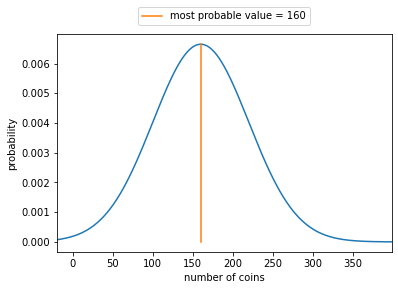

In [14]:
plt.plot(x, px)
plt.xlim([x[0], x[-1]])
plt.ylabel('probability')
plt.xlabel('number of coins')

# If students just want to guess right, and they do not care how much money
# they'll get they should guess the most probable value.
h2, = plt.plot([m, m], [0, stats.norm.pdf(m, loc=m, scale=s)])
plt.legend(
    (h2,),
    ('most probable value = {}'.format(m),),
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02)
);

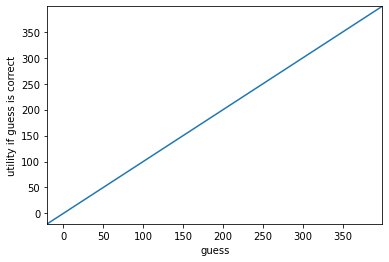

In [15]:
# Alternatively students might want to maximize the exepected utility of the
# number coins. Assume that utility of the money is linear.
# Plot the utility
plt.plot(x, x)
plt.ylabel('utility if guess is correct')
plt.xlabel('guess')
plt.xlim([x[0], x[-1]])
plt.ylim([x[0], x[-1]]);

(-20.0, 399.0)

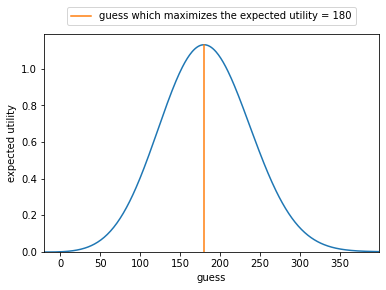

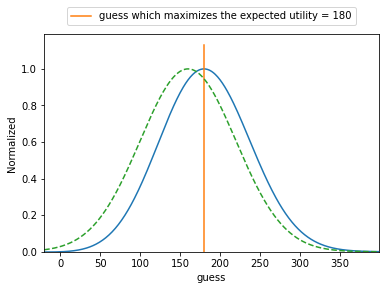

In [16]:
# If students guess value a, given their estimate of the uncertainity,
# probability that they get a coins is p(a), and expected utility is a*p(a).
# Plot the expected utility 
plt.plot(x, xpx)
plt.ylabel('expected utility')
plt.xlabel('guess')
plt.ylim([0, plt.ylim()[1]])
plt.xlim([x[0], x[-1]])

# Compute the maximum of the expected utility
mi = np.argmax(xpx)
meu = xpx[mi]
meux = x[mi]
h3, = plt.plot([meux, meux], [0, meu])
plt.legend(
    (h3,),
    ('guess which maximizes the expected utility = {}'.format(meux),),
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02)
);
plt.figure()
plt.plot(x, xpx/max(xpx))
h3, = plt.plot([meux, meux], [0, meu])
plt.legend(
    (h3,),
    ('guess which maximizes the expected utility = {}'.format(meux),),
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02)
);
plt.plot(x, px/max(px),'--')
plt.ylabel('Normalized')
plt.xlabel('guess')
plt.ylim([0, plt.ylim()[1]])
plt.xlim([x[0], x[-1]])